# Analysis of On Water Tests

# Brief
Herein I generate plots and an analysis from the on water test results, and work towards discovering metrics for automated batch testing, building upon the original template analyze.py script. 

### TODO

In [445]:
import sys
import os
import json 
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.path import Path
import warnings
plt.rcParams['font.family'] = 'Ubuntu'
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
font_manager.findfont("Ubuntu") # Test with "Special Elite" too

warnings.filterwarnings("ignore") #matplotlib and pandas are too verbose

In [656]:

themed_colors = [
                "#FFEBB0", #0: yellow
                "#FAA15A",  #1: orange
                "#9BD79A",  #2: green
                "#5FBFC0",  #3: teal
                "#B3FEFE",  #4: blue
                "#F37B4D",  #5: tangerine
                "#789ABC",  #6: navy
                "#EAEAEA",  #7: gray
                "#5A6E76",  #8: dark gray
                "#6D9898",  #9: gray teal
                 ]

mission_directory = "logs/test_1_mdm/"
trim_lb = 0
trim_ub = 200000000



In [964]:
if mission_directory[-1] == "/":
    mission_directory = mission_directory[:-1]
mission_hash = mission_directory.split("/")[-1]    
mission_hash = mission_hash.replace("_json","")

In [965]:
output_directory = f"{mission_directory}/"
output_directory = output_directory.replace("_json","")
try:
    os.mkdir(output_directory)
except OSError:
    pass 
    #print(f"Creation of the directory {path} failed")
    
mobile_node_name = "oak"


In [966]:

# Get all the data for this run


# Load DVL PDX CSV Data
glb = glob.glob(f"{mission_directory}/*PDX.csv")
dvl_pdx_fname = glb[0]
print(dvl_pdx_fname)
dvl_pdx = pd.read_csv(dvl_pdx_fname)

# Load DVL KFC CSV Data
glb = glob.glob(f"{mission_directory}/*KFC.csv")
dvl_kfc_fname = glb[0]
dvl_kfc = pd.read_csv(dvl_kfc_fname)

dvl_pdx = dvl_pdx.rename(columns={"timeSinceEpoch" : "time"}).set_index('time')

dvl_pdx["vx"] = dvl_pdx["deltaX"]/(dvl_pdx["duT"]/1000000)
dvl_pdx["vy"] = dvl_pdx["deltaY"]/(dvl_pdx["duT"]/1000000)
dvl_pdx["vz"] = dvl_pdx["deltaZ"]/(dvl_pdx["duT"]/1000000)

dvl_kfc = dvl_kfc.rename(columns={"timeSinceEpoch" : "time"}).set_index('time')


glb = glob.glob(f"{mission_directory}/*ros_csvs")
print(glb)
ros_csv_dir = glb[0]

robot_ros_odo = pd.read_csv(ros_csv_dir+"/odometryfiltered.csv")
robot_ros_rpy = pd.read_csv(ros_csv_dir+"/imurpyfiltered.csv")

glb = glob.glob(f"{mission_directory}/*OAK*/*alog_csvs/")
print(glb)
alog_csv_dir = glb[0]

robot_alog_deploy = pd.read_csv(alog_csv_dir+"/DEPLOY.csv")
robot_alog_vbat = pd.read_csv(alog_csv_dir+"/M300_BATT_VOLTAGE.csv")
robot_alog_wpt_idx = pd.read_csv(alog_csv_dir+"/WPT_INDEX.csv")
robot_alog_wpt_odo = pd.read_csv(alog_csv_dir+"/WPT_ODO.csv")


logs/test_1_mdm/2024-08-20_20-42-36_Tracker650_PDX.csv
['logs/test_1_mdm/2024-08-20-20-35-55_ros_csvs']
['logs/test_1_mdm/LOG_OAK_20_8_2024_____20_42_35/log_oak_20_8_2024_____20_42_35_alog_csvs/']


In [967]:
robot_ros_rpy = robot_ros_rpy.rename(columns={"vector:x" : "rroll", 
                        "vector:y" : "rpitch", 
                        "vector:z" : "ryaw"})
robot_ros_rpy[["rroll", "rpitch", "ryaw"]] = robot_ros_rpy[["rroll", "rpitch", "ryaw"]]*180/np.pi
robot_ros_rpy = robot_ros_rpy[["time","rroll", "rpitch", "ryaw"]].set_index("time")

In [968]:
robot_ros_rpy

,rroll,rpitch,ryaw
time,,,
1.724201e+09,-5.292697,-1.810691,108.200158
1.724201e+09,-5.338220,-1.756162,108.345455
1.724201e+09,-5.448798,-1.706168,108.517521
1.724201e+09,-5.390926,-1.642905,108.526277
1.724201e+09,-5.444500,-1.599366,108.587372
...,...,...,...
1.724203e+09,-4.370612,-4.610863,162.721512
1.724203e+09,-4.279736,-3.941380,162.790895
1.724203e+09,-3.941454,-3.105597,162.864152


In [1000]:
glb = glob.glob(f"{mission_directory}/*OAK*/*.json")
print(glb)
oak_jsonfn = glb[0]

oak_jsonf = open(oak_jsonfn)
oak_json = json.load(oak_jsonf)

print("-- INFO --")
for k, v in oak_json["info"].items():
    print(f"{k}: {v}")


print("-- Variables available --")
for k in oak_json["data"].keys():
    print(f"\t-{k}")

['logs/test_1_mdm/LOG_OAK_20_8_2024_____20_42_35/log_oak_20_8_2024_____20_42_35.json']
-- INFO --
logfile: logs/test_1//LOG_OAK_20_8_2024_____20_42_35/LOG_OAK_20_8_2024_____20_42_35.alog
alias: LOG_OAK_20_8_2024_____20_42_35
opendate: Wed Dec 31 19:00:00 1969
logstart: 1724200954.991942
-- Variables available --
	-APPCAST_REQ_ALL
	-IVPHELM_REGISTER
	-PROC_WATCH_TIME_WARP
	-PROC_WATCH_EVENT
	-PROC_WATCH_SUMMARY
	-PROC_WATCH_ALL_OK
	-UPROCESSWATCH_ITER_LEN
	-APPCAST
	-APPCAST_REQ
	-APPCAST_REQ_OAK
	-LOGGER_DIRECTORY
	-DB_EVENT
	-MOOS_DEBUG
	-PLOGGER_CMD
	-IVPHELM_STATE
	-IVPHELM_ALLSTOP
	-DESIRED_SPEED
	-DESIRED_HEADING
	-PHI_HOST_INFO
	-PSHARE_CMD
	-PSHARE_INPUT_SUMMARY
	-DB_TIME
	-DB_UPTIME
	-DB_CLIENTS
	-DB_QOS
	-DEPLOY
	-IVPHELM_DOMAIN
	-IVPHELM_MODESET
	-IM300HEALTH_ITER_LEN
	-IVPHELM_CPU
	-NAV_HEADING
	-IM300_ITER_LEN
	-DESIRED_RUDDER
	-DESIRED_THRUST
	-PNODEREPORTER_PID
	-PHELMIVP_PID
	-RETURN
	-STATION_KEEP
	-PHI_HOST_IP
	-PHI_HOST_IP_ALL
	-PHI_HOST_IP_VERBOSE
	-PHI_HOST_PORT_DB


In [1001]:
print("-- Extracting --")

def is_number(val):
    try:
        float(val)
        return True
    except:
        return False

select = ["NODE_REPORT_LOCAL",
         "M300_BATT_VOLTAGE",
         "DEPLOY",
         "RETURN",
         "STATION_KEEP",
         "WPT_INDEX",
         "WPT_ODO",
         "HEARTBEAT",
         "NAV_FULL_STATE",
         "DESIRED_SPEED",
         "DESIRED_HEADING",
         "COMPASS_HEADING",
         "COMPASS_HEADING_RAW",
         "TURN_RATE"]

nrl_select = ["NAME", "X", "Y", "SPD", "HDG", "LAT", "LON", "MODE"]

collection = []
for s in select:
    print(s)
    moos_var_stream = oak_json["data"][s]
    var_stream_collection = []
    col_names = []
    test_entry = moos_var_stream[-1]
    if isinstance(test_entry[1], dict):
        for entry in moos_var_stream:
            t = float(entry[0])
            dat = entry[1]
            src = entry[2]
            if s == "NODE_REPORT_LOCAL":
                entry_data = {k : dat[k] for k in nrl_select}
                entry_data['time'] = t
                var_stream_collection.append(entry_data)
    elif is_number(test_entry[1]):
        for entry in moos_var_stream:
            t = float(entry[0])
            dat = float(entry[1])
            src = entry[2]
            entry_data = {'time': t, s.lower() : dat}
            var_stream_collection.append(entry_data)
    elif isinstance(test_entry[1], str):
        for entry in moos_var_stream:
            t = float(entry[0])
            dat = entry[1]
            src = entry[2]
            entry_data = {'time': t, s.lower() : dat}
            var_stream_collection.append(entry_data)
    else: 
        print("> Error")
        print(f">\t {s} : {type(test_entry[1])}")
    df = pd.DataFrame(var_stream_collection)
    df.set_index('time', inplace=True)
    collection.append(df.copy())

-- Extracting --
NODE_REPORT_LOCAL
M300_BATT_VOLTAGE
DEPLOY
RETURN
STATION_KEEP
WPT_INDEX
WPT_ODO
HEARTBEAT
NAV_FULL_STATE
DESIRED_SPEED
DESIRED_HEADING
COMPASS_HEADING
COMPASS_HEADING_RAW
TURN_RATE


In [1002]:
collection.append(robot_ros_rpy)

all_data_df = collection.pop()
for df in collection:
    all_data_df = all_data_df.join(df, how='outer')

In [1003]:
dvl_pdx_ridx[["vx","vy","vz",]].describe()

,vx,vy,vz
count,142011.000000,142011.000000,142011.000000
mean,0.887358,0.061643,0.017778
std,0.264546,0.039771,0.020696
min,-0.075200,-0.063400,-0.093200
25%,0.891500,0.035500,0.002300
50%,0.946800,0.061500,0.017100
75%,0.989600,0.086900,0.031100
max,1.593000,0.279600,0.148900


In [1004]:
all_data_df.head()
#all_data_df.fillna(method='ffill',inplace=True)

if 1:
    all_data_df = all_data_df.interpolate()
    all_data_df = all_data_df.fillna(method='ffill').fillna(method='bfill')
else:
    all_data_df.fillna(method='ffill',inplace=True)
        

#All NaNs that remain, is in the very start of the mission when agents are being brought online, such that 
# no data exists to be filled forward (drop it)
all_data_df.dropna(inplace=True)
all_data_df = all_data_df.sort_index()

all_data_df = all_data_df[~all_data_df.index.duplicated(keep='first')]

all_indices = all_data_df.index.union(dvl_pdx.index).union(dvl_kfc.index)
all_data_df_ridx = all_data_df.reindex(all_indices)
all_data_df_ridx.fillna(method='ffill',inplace=True)


dvl_pdx_mask = dvl_pdx.reindex(all_indices).notna()
dvl_kfc_mask = dvl_kfc.reindex(all_indices).notna()
dvl_pdx_ridx = dvl_pdx.reindex(all_indices)
dvl_kfc_ridx = dvl_kfc.reindex(all_indices)

dvl_pdx_ridx[["vx", "vy", "vz"]] = dvl_pdx_ridx[["vx", "vy", "vz"]].fillna(method="ffill")
#dvl_pdx_ridx[["vx", "vy", "vz"]] = dvl_pdx_ridx[["vx", "vy", "vz"]].where(dvl_pdx_mask.any(axis=1))

dvl_pdx_ridx = dvl_pdx_ridx.fillna(0)
dvl_kfc_ridx = dvl_kfc_ridx.fillna(0)

all_data_df_ridx = pd.concat([all_data_df_ridx, dvl_pdx_ridx, dvl_kfc_ridx], axis=1)

all_data_df_ridx.tail()
all_data_df = all_data_df_ridx

In [1005]:
all_data_df["heading_to_cart_deg"] = (450 - all_data_df["HDG"])%360
all_data_df["cart_heading_rads"] = all_data_df["heading_to_cart_deg"]*np.pi / 180.0
all_data_df["roll_rads"] = all_data_df["rroll"]*np.pi / 180.0
all_data_df["pitch_rads"] = all_data_df["rpitch"]*np.pi / 180.0

In [1006]:
# Set the window size for the rolling calculation
window_size = 100  # Adjust this value as needed

# Calculate velocities using a rolling window
all_data_df['nr_vx'] = all_data_df['X'].diff(window_size) / all_data_df.index.diff(window_size)
all_data_df['nr_vy'] = all_data_df['Y'].diff(window_size) / all_data_df.index.diff(window_size)

# Calculate velocity magnitude
all_data_df['nr_v_mag_est'] = np.sqrt(all_data_df['nr_vx']**2 + all_data_df['nr_vy']**2)

# Optional: Remove extreme outliers
velocity_limit = 2.4  # Adjust this value based on your expected maximum velocity
mask = (all_data_df['nr_v_mag_est'] > velocity_limit)
all_data_df.loc[mask, ['nr_vx', 'nr_vy', 'nr_v_mag_est']] = np.nan

In [1007]:
all_data_df[['nr_vx', 'nr_vy', 'nr_v_mag_est']].describe()

,nr_vx,nr_vy,nr_v_mag_est
count,141911.000000,141911.000000,141911.000000
mean,-0.010906,-0.017787,0.924843
std,0.876640,0.407776,0.282619
min,-1.404039,-1.688025,0.000000
25%,-0.953712,-0.107212,0.897457
50%,0.000000,-0.001820,0.978531
75%,0.940881,0.085120,1.050308
max,1.502538,1.629206,1.882229


In [1008]:
(all_data_df["X"].diff()/all_data_df.index.diff()).sample(100)

time
1.724201e+09     -3.056245
1.724201e+09    -35.496067
1.724202e+09     -5.737134
1.724202e+09     -7.292601
1.724201e+09      0.000000
                   ...    
1.724201e+09      0.268436
1.724201e+09   -172.179967
1.724202e+09     -0.393437
1.724203e+09      0.000000
1.724201e+09    289.262345
Length: 100, dtype: float64

In [1009]:
all_data_df[["nr_vx", "nr_vy", "nr_v_mag_est"]].describe()

,nr_vx,nr_vy,nr_v_mag_est
count,141911.000000,141911.000000,141911.000000
mean,-0.010906,-0.017787,0.924843
std,0.876640,0.407776,0.282619
min,-1.404039,-1.688025,0.000000
25%,-0.953712,-0.107212,0.897457
50%,0.000000,-0.001820,0.978531
75%,0.940881,0.085120,1.050308
max,1.502538,1.629206,1.882229


In [1010]:

for elem in all_data_df.columns:
    print(elem)


rroll
rpitch
ryaw
NAME
X
Y
SPD
HDG
LAT
LON
MODE
m300_batt_voltage
deploy
return
station_keep
wpt_index
wpt_odo
heartbeat
nav_full_state
desired_speed
desired_heading
compass_heading
compass_heading_raw
turn_rate
utimeSinceBoot
duT
angleDeltaRoll
angleDeltaPitch
angleDeltaYaw
deltaX
deltaY
deltaZ
latestConfidence
mode
pitch
roll
yaw
standoff
valid
vx
vy
vz
id
seq
dt
tod
channelA_cg
channelA_pc
channelA_ra
channelA_rc
channelA_vv
channelA_vc
channelB_cg
channelB_pc
channelB_ra
channelB_rc
channelB_vv
channelB_vc
channelC_cg
channelC_pc
channelC_ra
channelC_rc
channelC_vv
channelC_vc
endOfMessageTag
heading_to_cart_deg
cart_heading_rads
roll_rads
pitch_rads
nr_vx
nr_vy
nr_v_mag_est


In [1011]:

all_data_df["deltaVX"] = all_data_df["deltaX"].copy()
all_data_df["deltaVY"] = all_data_df["deltaY"].copy()
all_data_df["deltaVZ"] = all_data_df["deltaZ"].copy()

# def rotate_vectors(angles, vx, vy, vz):
#     cos_angles = np.cos(angles)
#     sin_angles = np.sin(angles)
    
#     wx = vx * cos_angles - vy * sin_angles
#     wy = vx * sin_angles + vy * cos_angles
#     wz = vz
    
#     return wx, wy, wz

def rotate_vectors(roll, pitch, yaw, vx, vy, vz):
    # Convert angles to radians if they're not already
    roll_rad = np.asarray(roll)
    pitch_rad = np.asarray(pitch)
    yaw_rad = np.asarray(yaw)
    
    # Precompute sines and cosines
    cos_roll, sin_roll = np.cos(roll_rad), np.sin(roll_rad)
    cos_pitch, sin_pitch = np.cos(pitch_rad), np.sin(pitch_rad)
    cos_yaw, sin_yaw = np.cos(yaw_rad), np.sin(yaw_rad)
    
    # Yaw rotation (around Z-axis)
    wx = vx * cos_yaw - vy * sin_yaw
    wy = vx * sin_yaw + vy * cos_yaw
    wz = vz
    
    # Pitch rotation (around Y-axis)
    vx_temp = wx * cos_pitch + wz * sin_pitch
    wy_temp = wy
    wz = -wx * sin_pitch + wz * cos_pitch
    
    # Roll rotation (around X-axis)
    wx = vx_temp
    wy = wy_temp * cos_roll - wz * sin_roll
    wz = wy_temp * sin_roll + wz * cos_roll
    
    return wx, wy, wz

all_data_df['der-deltaX'], all_data_df['der-deltaY'], all_data_df['der-deltaZ'] = rotate_vectors(
    all_data_df["roll_rads"],
    all_data_df["pitch_rads"],
    all_data_df["cart_heading_rads"].values,
    all_data_df["deltaVX"].values,
    all_data_df["deltaVY"].values,
    all_data_df["deltaVZ"].values
)

# We have it so the DVL implies instantaneous velocity with the dt and the change in position, and we simply work backwards from their result. We must update the context since the df is no longer a delta, but a propagated state


all_data_df['der-VX'], all_data_df['der-VY'], all_data_df['der-VZ'] = rotate_vectors(
    all_data_df["roll_rads"],
    all_data_df["pitch_rads"],
    all_data_df["cart_heading_rads"].values,
    all_data_df["vx"].values,
    all_data_df["vy"].values,
    all_data_df["vz"].values
)


# Calculate cumulative sum
all_data_df['naive_dvl_x'] = all_data_df['der-deltaX'].cumsum()
all_data_df['naive_dvl_y'] = all_data_df['der-deltaY'].cumsum()
all_data_df['naive_dvl_z'] = all_data_df['der-deltaZ'].cumsum()


In [1012]:
all_data_df.columns

Index(['rroll', 'rpitch', 'ryaw', 'NAME', 'X', 'Y', 'SPD', 'HDG', 'LAT', 'LON',
       'MODE', 'm300_batt_voltage', 'deploy', 'return', 'station_keep',
       'wpt_index', 'wpt_odo', 'heartbeat', 'nav_full_state', 'desired_speed',
       'desired_heading', 'compass_heading', 'compass_heading_raw',
       'turn_rate', 'utimeSinceBoot', 'duT', 'angleDeltaRoll',
       'angleDeltaPitch', 'angleDeltaYaw', 'deltaX', 'deltaY', 'deltaZ',
       'latestConfidence', 'mode', 'pitch', 'roll', 'yaw', 'standoff', 'valid',
       'vx', 'vy', 'vz', 'id', 'seq', 'dt', 'tod', 'channelA_cg',
       'channelA_pc', 'channelA_ra', 'channelA_rc', 'channelA_vv',
       'channelA_vc', 'channelB_cg', 'channelB_pc', 'channelB_ra',
       'channelB_rc', 'channelB_vv', 'channelB_vc', 'channelC_cg',
       'channelC_pc', 'channelC_ra', 'channelC_rc', 'channelC_vv',
       'channelC_vc', 'endOfMessageTag', 'heading_to_cart_deg',
       'cart_heading_rads', 'roll_rads', 'pitch_rads', 'nr_vx', 'nr_vy',
       'nr_v_m

In [1013]:
#Base everything w/rt mission start
tbegin = all_data_df.index[0]
trim_lb -= tbegin
all_data_df.index = all_data_df.index - tbegin
all_data_df.dropna(inplace=True) 

In [1014]:
all_data_df = all_data_df.iloc[all_data_df.index < trim_ub]
all_data_df = all_data_df.iloc[all_data_df.index > trim_lb]


all_data_df["t"] = all_data_df.index
all_data_df.head()

,rroll,rpitch,ryaw,NAME,X,Y,SPD,HDG,LAT,LON,...,der-deltaX,der-deltaY,der-deltaZ,der-VX,der-VY,der-VZ,naive_dvl_x,naive_dvl_y,naive_dvl_z,t
time,,,,,,,,,,,,,,,,,,,,,
4.457131,-5.268777,-1.891283,108.433822,oak,8.3,3.17,0.03,152.53,42.358464,-71.087347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.457131
4.507115,-5.245547,-1.910977,108.483539,oak,8.3,3.17,0.03,152.53,42.358464,-71.087347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.507115
4.558366,-5.151171,-1.820158,108.235547,oak,8.3,3.17,0.03,152.53,42.358464,-71.087347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.558366
4.608917,-5.068068,-1.795690,108.005263,oak,8.3,3.17,0.03,152.53,42.358464,-71.087347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.608917
4.659170,-5.044881,-1.840127,107.737744,oak,8.3,3.17,0.03,152.53,42.358464,-71.087347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.659170


In [1015]:
all_data_df.columns

Index(['rroll', 'rpitch', 'ryaw', 'NAME', 'X', 'Y', 'SPD', 'HDG', 'LAT', 'LON',
       'MODE', 'm300_batt_voltage', 'deploy', 'return', 'station_keep',
       'wpt_index', 'wpt_odo', 'heartbeat', 'nav_full_state', 'desired_speed',
       'desired_heading', 'compass_heading', 'compass_heading_raw',
       'turn_rate', 'utimeSinceBoot', 'duT', 'angleDeltaRoll',
       'angleDeltaPitch', 'angleDeltaYaw', 'deltaX', 'deltaY', 'deltaZ',
       'latestConfidence', 'mode', 'pitch', 'roll', 'yaw', 'standoff', 'valid',
       'vx', 'vy', 'vz', 'id', 'seq', 'dt', 'tod', 'channelA_cg',
       'channelA_pc', 'channelA_ra', 'channelA_rc', 'channelA_vv',
       'channelA_vc', 'channelB_cg', 'channelB_pc', 'channelB_ra',
       'channelB_rc', 'channelB_vv', 'channelB_vc', 'channelC_cg',
       'channelC_pc', 'channelC_ra', 'channelC_rc', 'channelC_vv',
       'channelC_vc', 'endOfMessageTag', 'heading_to_cart_deg',
       'cart_heading_rads', 'roll_rads', 'pitch_rads', 'nr_vx', 'nr_vy',
       'nr_v_m

time
4.457131               NaN
4.507115          0.000000
4.558366          0.000000
4.608917          0.000000
4.659170          0.000000
                  ...     
2389.550134    1947.354096
2389.598866    1947.354096
2389.651606    1947.354096
2389.701770    1947.354096
2389.750209    1947.354096
Length: 141911, dtype: float64


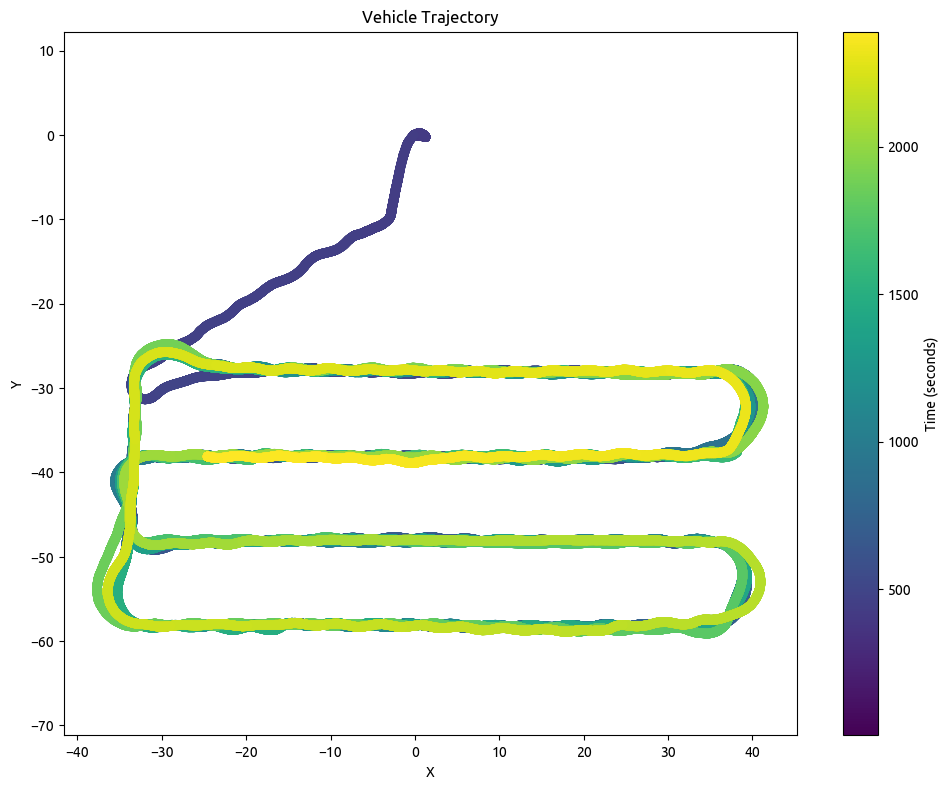

In [1030]:
# Figure 1: X vs Y scatter plot with time-based color
fig1, ax1 = plt.subplots(figsize=(10, 8))
x_traj = all_data_df['X'] - all_data_df['X'].iloc[0]
y_traj = all_data_df['Y'] - all_data_df['Y'].iloc[0]

scatter = ax1.scatter(x_traj, y_traj, c=all_data_df['t'], cmap='viridis')
odom_truth = np.sqrt(x_traj.diff()**2 + y_traj.diff()**2).cumsum()
print(odom_truth)
plt.colorbar(scatter, label='Time (seconds)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Vehicle Trajectory')
ax1.axis('equal')
fig1.tight_layout()

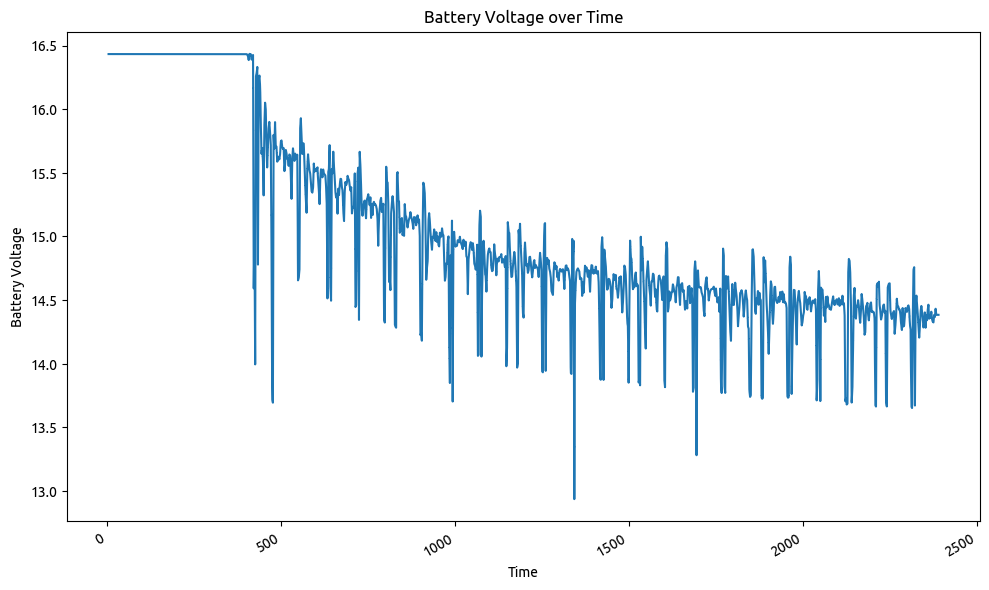

In [1017]:
# Figure 2: Battery voltage over time
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(all_data_df.index, all_data_df['m300_batt_voltage'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Battery Voltage')
ax2.set_title('Battery Voltage over Time')
fig2.autofmt_xdate()  # Rotate and align the tick labels
fig2.tight_layout()

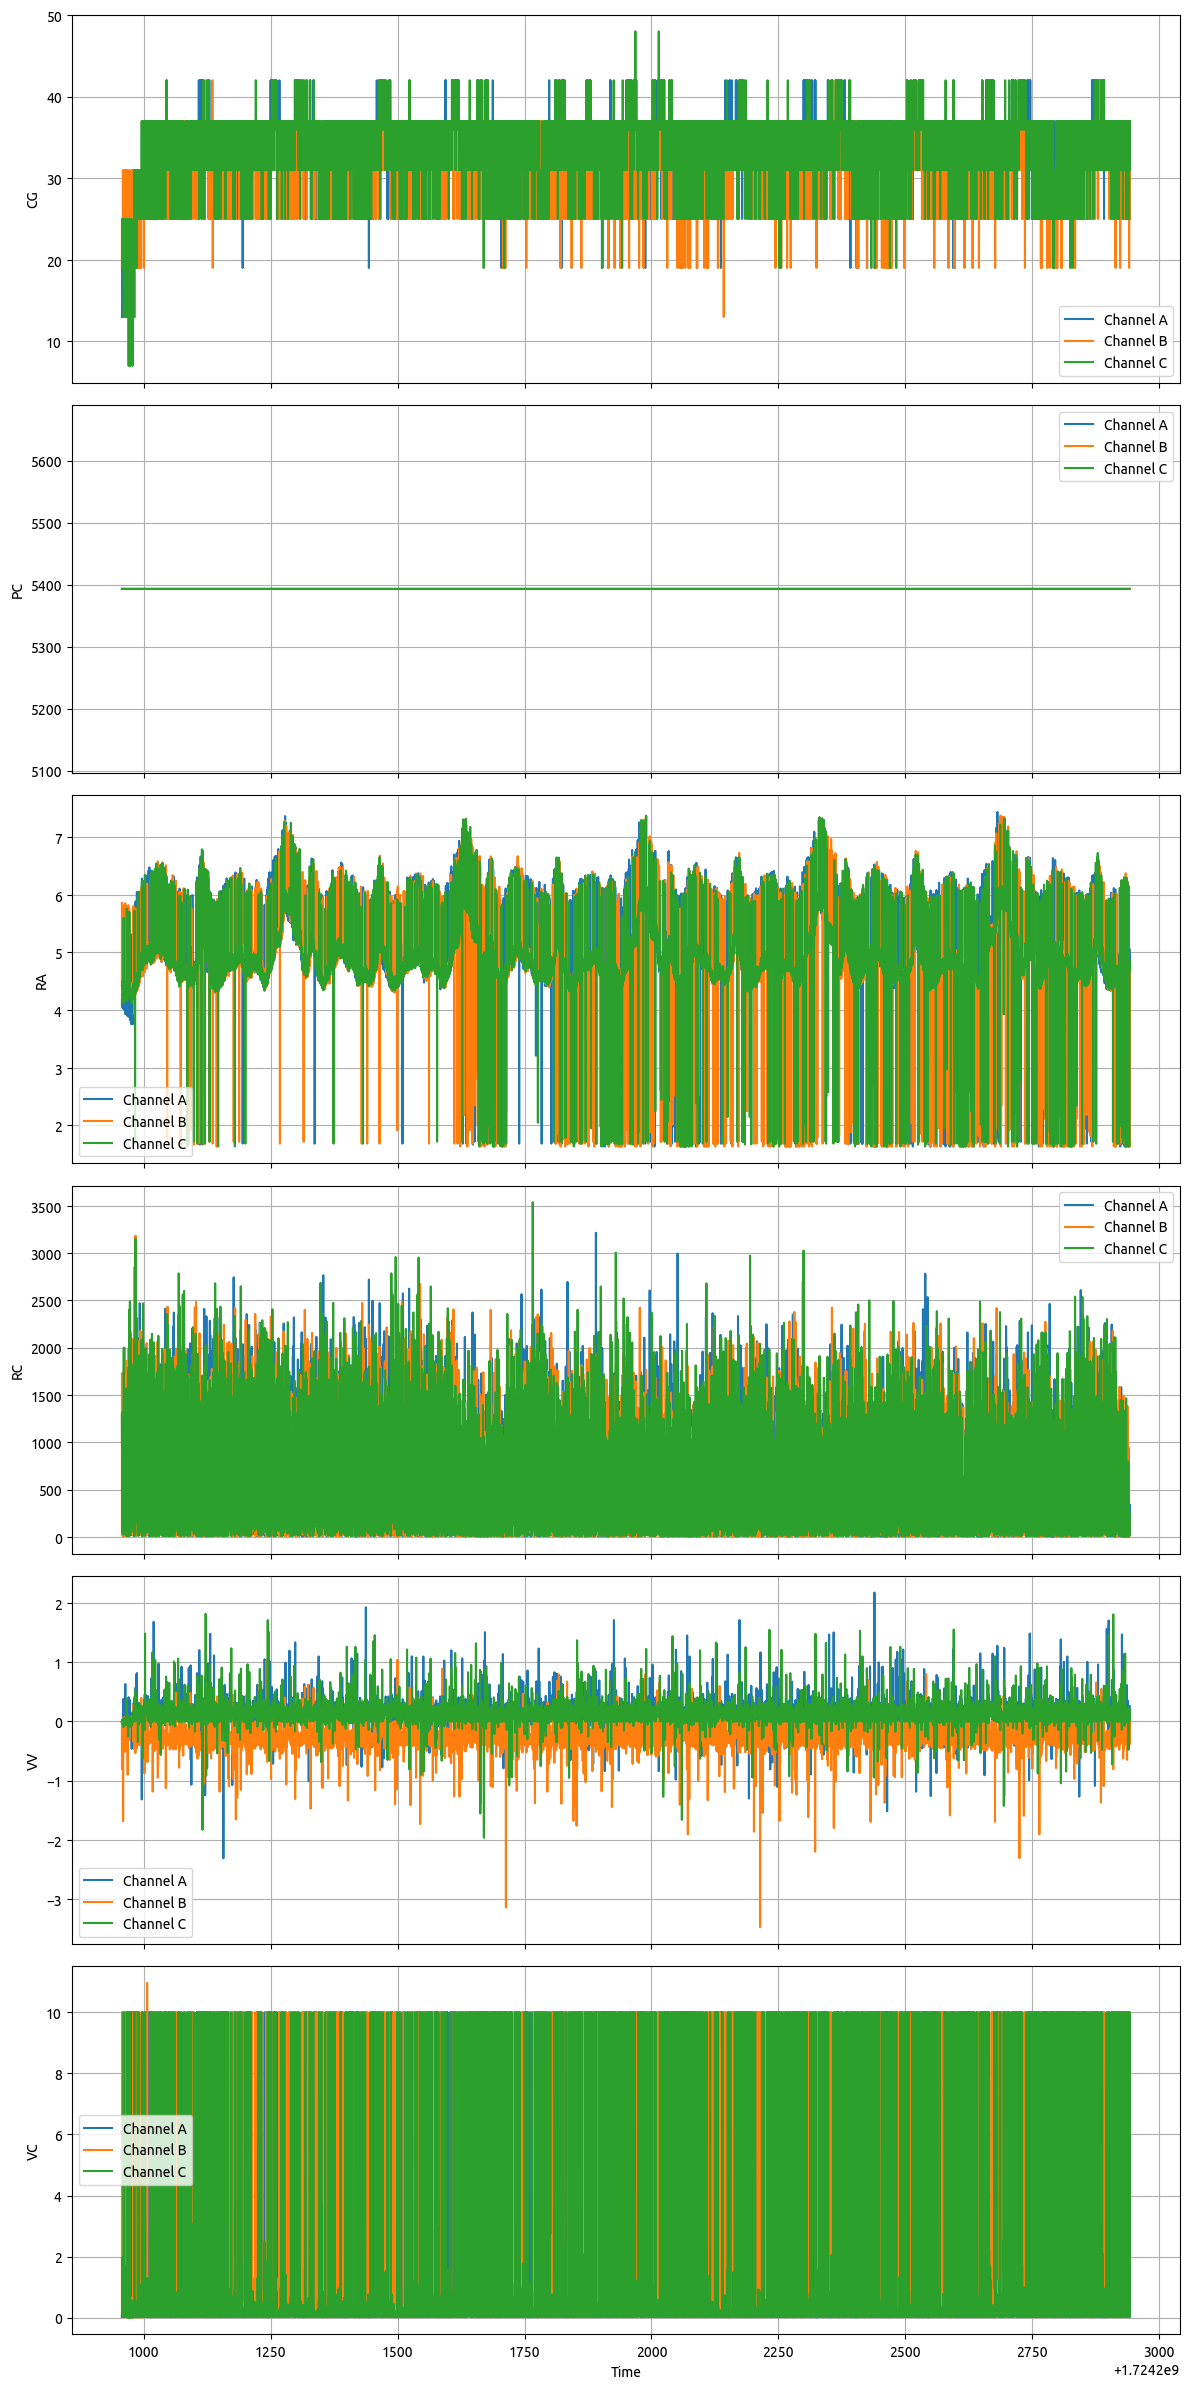

In [1018]:
# Figure 3: Channel values over time
channel_vars = ['cg', 'pc', 'ra', 'rc', 'vv', 'vc']
fig3, axs3 = plt.subplots(len(channel_vars), 1, figsize=(12, 4*len(channel_vars)), sharex=True)
for i, var in enumerate(channel_vars):
    for channel in ['A', 'B', 'C']:
        axs3[i].plot(dvl_kfc.index, dvl_kfc[f'channel{channel}_{var}'], label=f'Channel {channel}')
    axs3[i].set_ylabel(var.upper())
    axs3[i].legend()
    axs3[i].grid(True)
axs3[-1].set_xlabel('Time')
fig3.tight_layout()

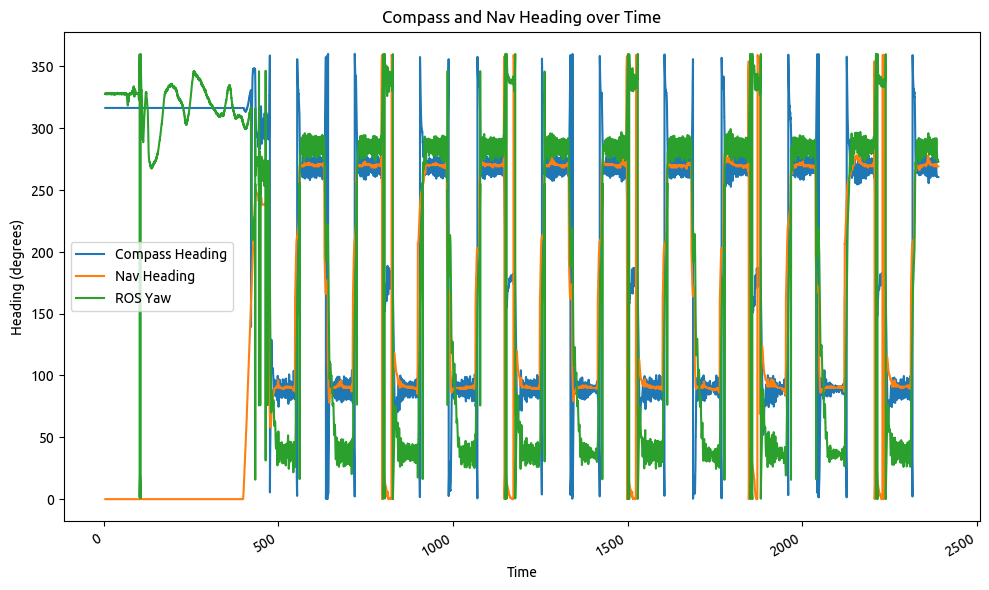

In [1019]:
# Figure 4: Compass heading and nav heading over time
fig4, ax4 = plt.subplots(figsize=(10, 6))
ax4.plot(all_data_df.index, all_data_df['compass_heading'], label='Compass Heading')
ax4.plot(all_data_df.index, all_data_df['desired_heading'], label='Nav Heading')
ax4.plot(all_data_df.index, (450-all_data_df['ryaw'] - 14.07)%360, label='ROS Yaw')
ax4.set_xlabel('Time')
ax4.set_ylabel('Heading (degrees)')
ax4.set_title('Compass and Nav Heading over Time')
ax4.legend()
fig4.autofmt_xdate()
fig4.tight_layout()


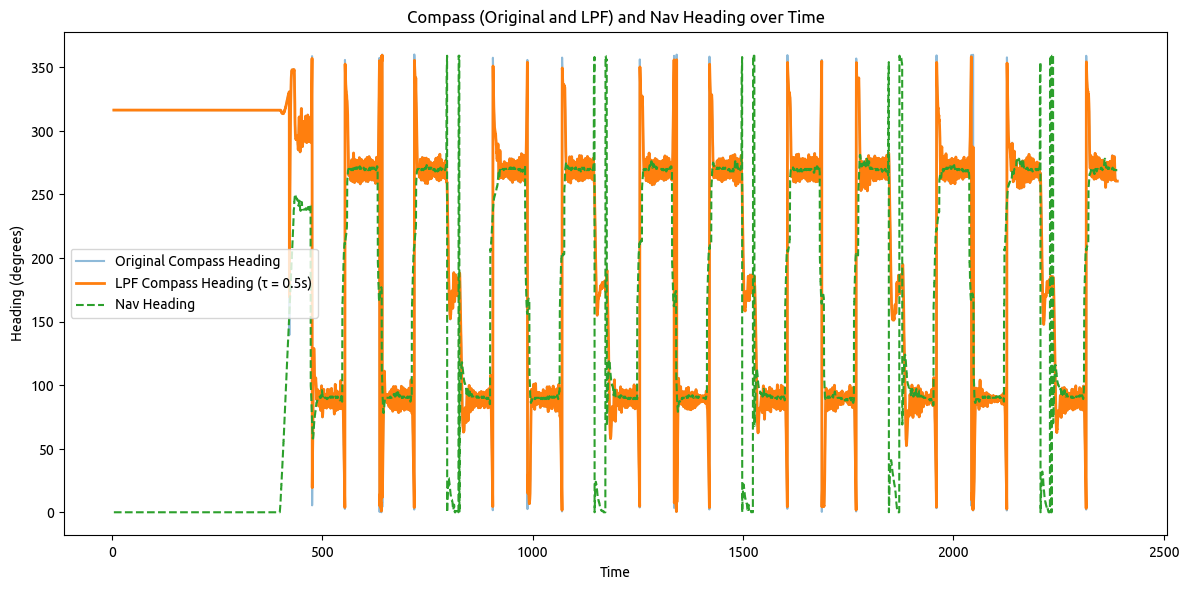

In [1020]:
def apply_lpf_dynamic(series, time_constant, time_index):
    filtered = pd.Series(index=series.index, dtype=float)
    filtered.iloc[0] = series.iloc[0]
    
    for i in range(1, len(series)):
        dt = time_index[i] - time_index[i-1]
        dt = max(dt, 0.1)  # Use 0.1 if dt is zero or very small
        alpha = 1 - np.exp(-dt / time_constant)
        filtered.iloc[i] = alpha * series.iloc[i] + (1 - alpha) * filtered.iloc[i-1]
    
    return filtered

# Assuming all_data_df is your dataframe

# Apply LPF to compass heading
time_constant = 0.5  # Set your desired time constant in seconds
all_data_df['compass_heading_lpf'] = apply_lpf_dynamic(all_data_df['compass_heading'], time_constant, all_data_df.index)

# Create the plot
fig4, ax4 = plt.subplots(figsize=(12, 6))

# Plot original compass heading
ax4.plot(all_data_df.index, all_data_df['compass_heading'], label='Original Compass Heading', alpha=0.5)

# Plot LPF compass heading
ax4.plot(all_data_df.index, all_data_df['compass_heading_lpf'], label=f'LPF Compass Heading (τ = {time_constant}s)', linewidth=2)

# Plot nav heading
ax4.plot(all_data_df.index, all_data_df['desired_heading'], label='Nav Heading', linestyle='--')

ax4.set_xlabel('Time')
ax4.set_ylabel('Heading (degrees)')
ax4.set_title('Compass (Original and LPF) and Nav Heading over Time')
ax4.legend()
fig4.tight_layout()

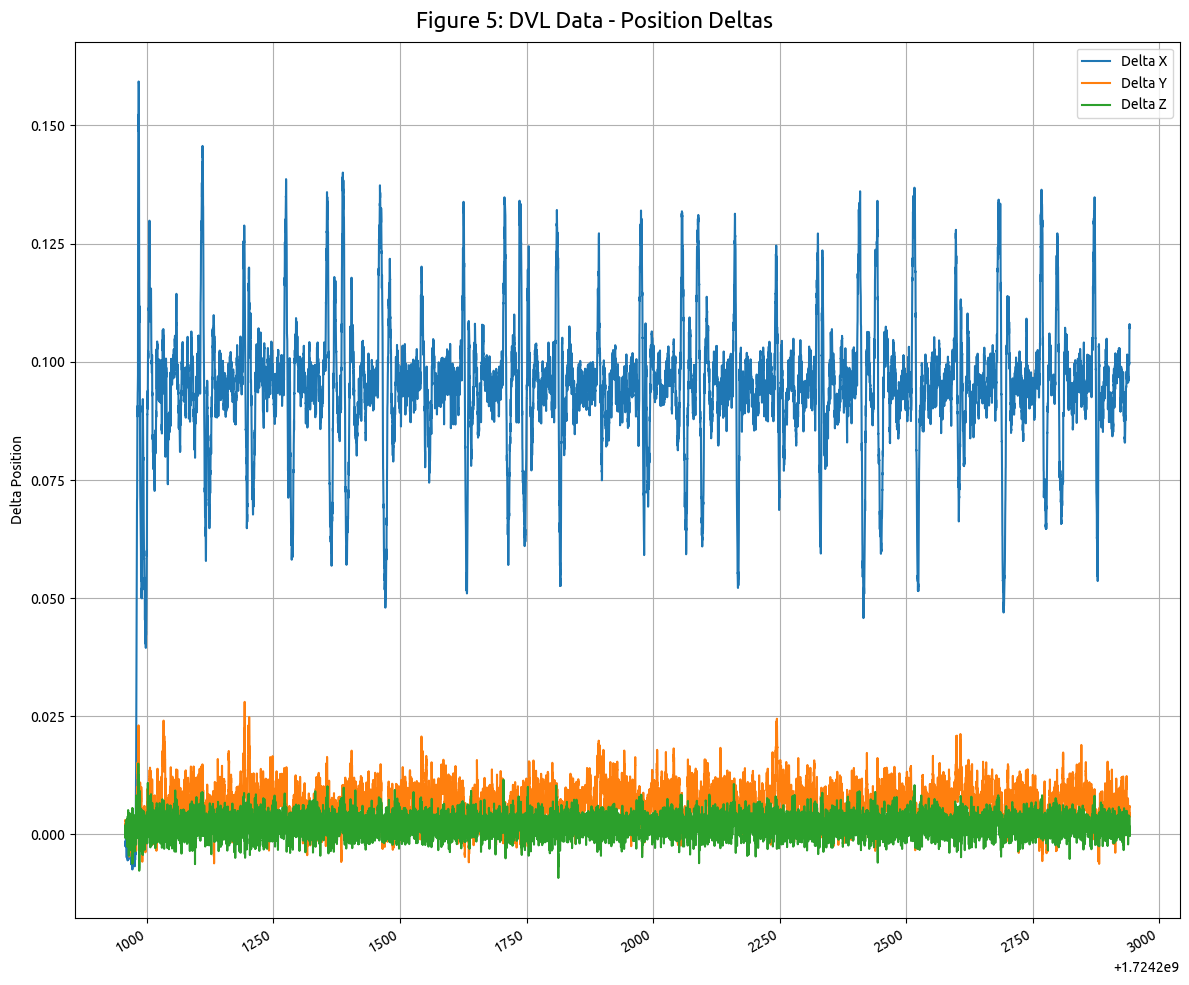

In [1021]:
# Figure 5: DVL data (delta x, y, z and delta roll, pitch, yaw)
fig5, (ax5_1) = plt.subplots(1, 1, figsize=(12, 10), sharex=True)

# Delta x, y, z
ax5_1.plot(dvl_pdx.index, dvl_pdx['deltaX'], label='Delta X')
ax5_1.plot(dvl_pdx.index, dvl_pdx['deltaY'], label='Delta Y')
ax5_1.plot(dvl_pdx.index, dvl_pdx['deltaZ'], label='Delta Z')
ax5_1.set_ylabel('Delta Position')
ax5_1.legend()
ax5_1.grid(True)

fig5.suptitle('Figure 5: DVL Data - Position Deltas', fontsize=16)
fig5.autofmt_xdate()
fig5.tight_layout()

time
4.457131               NaN
4.507115          0.000000
4.558366          0.000000
4.608917          0.000000
4.659170          0.000000
                  ...     
2389.550134    1859.221994
2389.598866    1859.221994
2389.651606    1859.221994
2389.701770    1859.221994
2389.750209    1859.221994
Length: 141911, dtype: float64
time
4.457131             NaN
4.507115        0.000000
4.558366        0.000000
4.608917        0.000000
4.659170        0.000000
                 ...    
2389.550134    88.132102
2389.598866    88.132102
2389.651606    88.132102
2389.701770    88.132102
2389.750209    88.132102
Length: 141911, dtype: float64
time
4.457131            NaN
4.507115            NaN
4.558366            NaN
4.608917            NaN
4.659170            NaN
                 ...   
2389.550134    4.525736
2389.598866    4.525736
2389.651606    4.525736
2389.701770    4.525736
2389.750209    4.525736
Length: 141911, dtype: float64


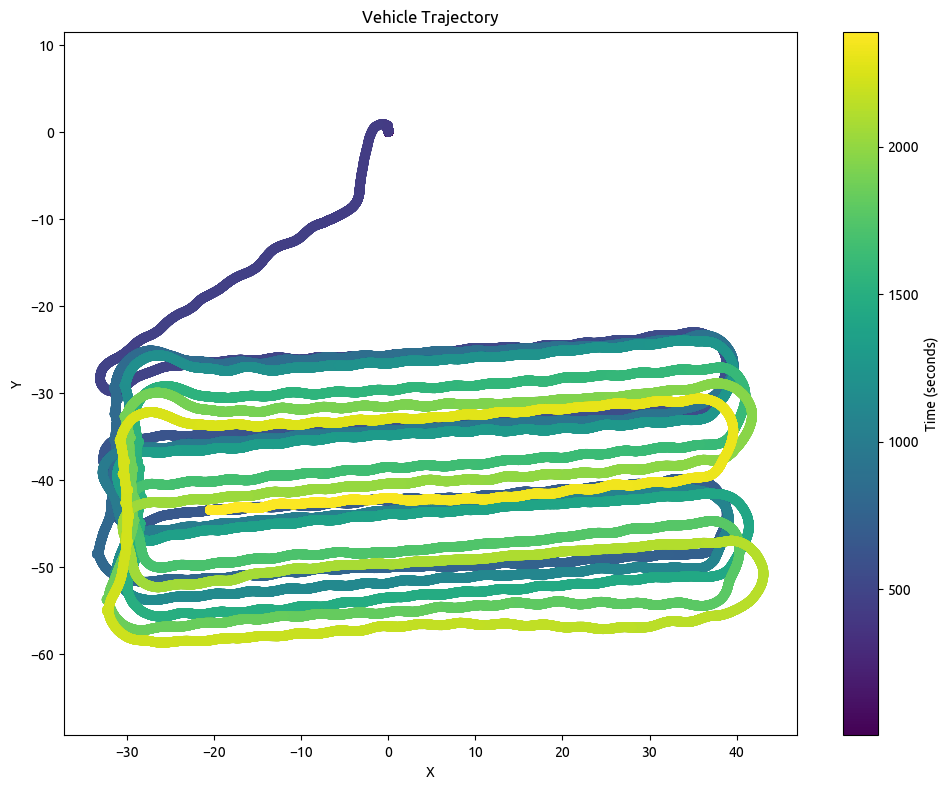

In [1032]:
# Figure 6: X vs Y scatter plot with time-based color
fig6, ax6 = plt.subplots(figsize=(10, 8))
scatter = ax6.scatter(all_data_df['naive_dvl_x'], all_data_df['naive_dvl_y'], c=all_data_df['t'], cmap='viridis')

x_traj_dvl = all_data_df['naive_dvl_x']
y_traj_dvl = all_data_df['naive_dvl_y']

odom_dvl = np.sqrt(x_traj_dvl.diff()**2 + y_traj_dvl.diff()**2).cumsum()
print(odom_dvl)
print(abs(odom_truth-odom_dvl))
print(100*abs((odom_truth-odom_dvl))/odom_truth)

plt.colorbar(scatter, label='Time (seconds)')
ax6.set_xlabel('X')
ax6.set_ylabel('Y')
ax6.set_title('Vehicle Trajectory')
ax6.axis('equal')
fig6.tight_layout()

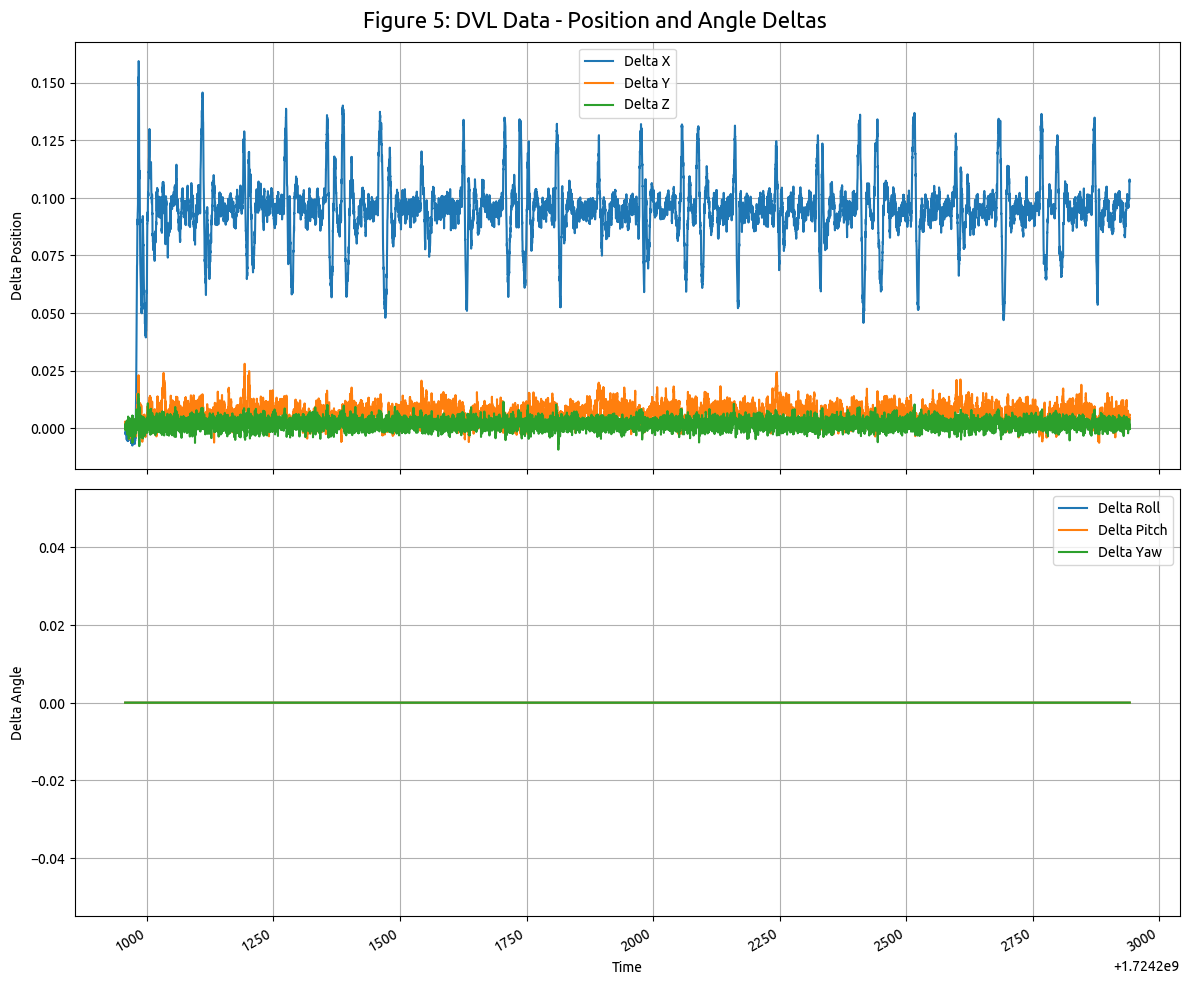

In [1023]:
# Figure 5: Compare velocities of the heron as backtracked from the navigation positional data, vs. the dvl estimates for velocities
fig5, (ax5_1, ax5_2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Delta x, y, z
ax5_1.plot(dvl_pdx.index, dvl_pdx['deltaX'], label='Delta X')
ax5_1.plot(dvl_pdx.index, dvl_pdx['deltaY'], label='Delta Y')
ax5_1.plot(dvl_pdx.index, dvl_pdx['deltaZ'], label='Delta Z')
ax5_1.set_ylabel('Delta Position')
ax5_1.legend()
ax5_1.grid(True)

# Delta roll, pitch, yaw
ax5_2.plot(dvl_pdx.index, dvl_pdx['angleDeltaRoll'], label='Delta Roll')
ax5_2.plot(dvl_pdx.index, dvl_pdx['angleDeltaPitch'], label='Delta Pitch')
ax5_2.plot(dvl_pdx.index, dvl_pdx['angleDeltaYaw'], label='Delta Yaw')
ax5_2.set_xlabel('Time')
ax5_2.set_ylabel('Delta Angle')
ax5_2.legend()
ax5_2.grid(True)

fig5.suptitle('Figure 5: DVL Data - Position and Angle Deltas', fontsize=16)
fig5.autofmt_xdate()
fig5.tight_layout()

In [1024]:
print( all_data_df[['vx','vy','vz']].iloc[4000:4006])

             vx   vy   vz
time                     
206.145691  0.0  0.0  0.0
206.194610  0.0  0.0  0.0
206.244439  0.0  0.0  0.0
206.298259  0.0  0.0  0.0
206.346208  0.0  0.0  0.0
206.395154  0.0  0.0  0.0


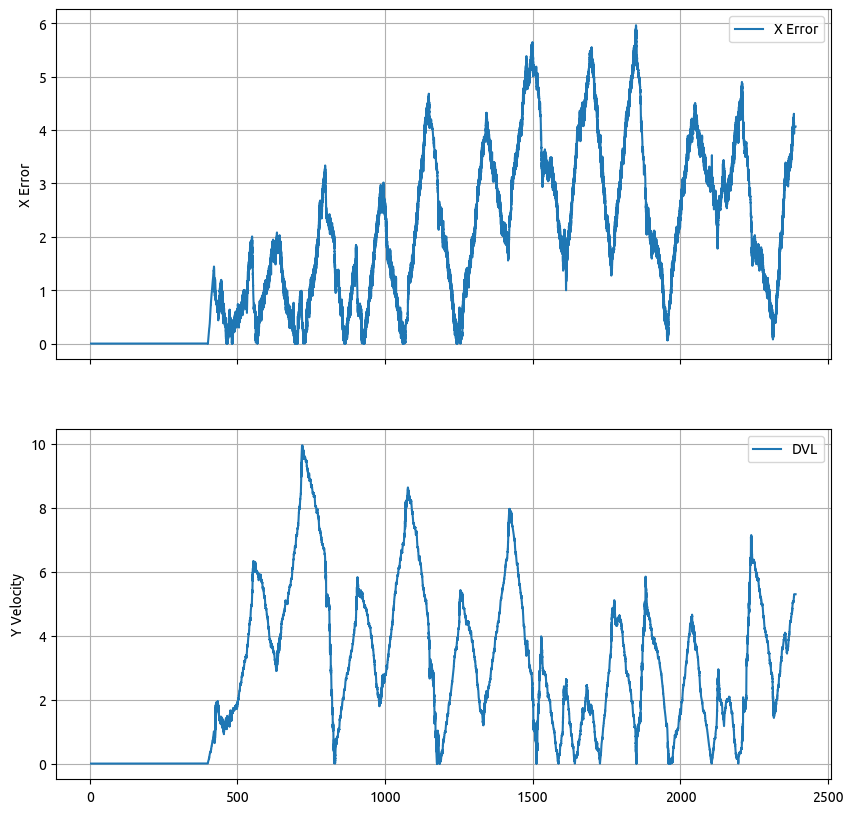

In [1025]:
# Plot the velocities from the DVL
fig8, (ax1_1, ax1_2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Delta x, y, z
x_err = all_data_df['X']-all_data_df['X'].iloc[0]-all_data_df['naive_dvl_x']
x_err = np.sqrt(x_err**2)
ax1_1.plot(all_data_df.index, x_err, label='X Error')
ax1_1.set_ylabel('X Error')
ax1_1.legend()
ax1_1.grid(True)
#ax1_1.set_ylim([-0.2, 1.5])

y_err = all_data_df['Y']-all_data_df['Y'].iloc[0]-all_data_df['naive_dvl_y']
y_err = np.sqrt(y_err**2)
ax1_2.plot(all_data_df.index, y_err, label='DVL')
ax1_2.set_ylabel('Y Velocity')
ax1_2.legend()
ax1_2.grid(True)
#ax1_2.set_ylim([-0.2, 1.5])

fig5.suptitle('Figure 5: DVL Data - Position and Angle Deltas', fontsize=16)
fig5.autofmt_xdate()
fig5.tight_layout()

9.950462669995414


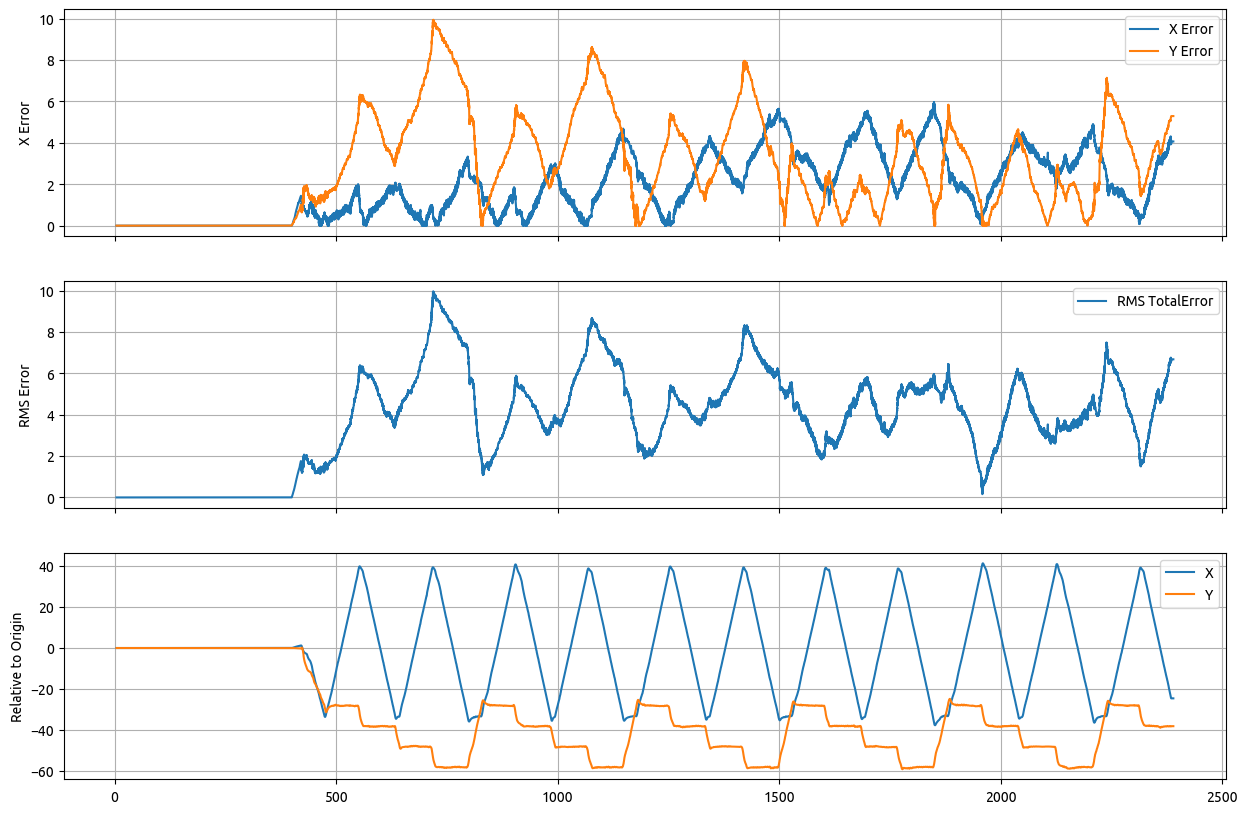

In [1026]:
fig8, (ax1_1,ax1_2, ax1_3) = plt.subplots(3, 1, figsize=(15, 10), sharex=True)


ax1_1.plot(all_data_df.index, x_err, label='X Error')
ax1_1.plot(all_data_df.index, y_err, label='Y Error')
ax1_1.set_ylabel('X Error')
ax1_1.legend()
ax1_1.grid(True)

rms_total = np.sqrt(x_err**2 + y_err**2)
print(rms_total.max())
ax1_2.plot(all_data_df.index, rms_total, label='RMS TotalError')
ax1_2.set_ylabel('RMS Error')
ax1_2.legend()
ax1_2.grid(True)

ax1_3.plot(all_data_df.index, all_data_df["X"]-all_data_df["X"].iloc[0], label='X')
ax1_3.plot(all_data_df.index, all_data_df["Y"]-all_data_df["Y"].iloc[0], label='Y')
ax1_3.set_ylabel('Relative to Origin')
ax1_3.legend()
ax1_3.grid(True)

fig5.suptitle('Compared Errors (x,y)', fontsize=16)
fig5.autofmt_xdate()
fig5.tight_layout()

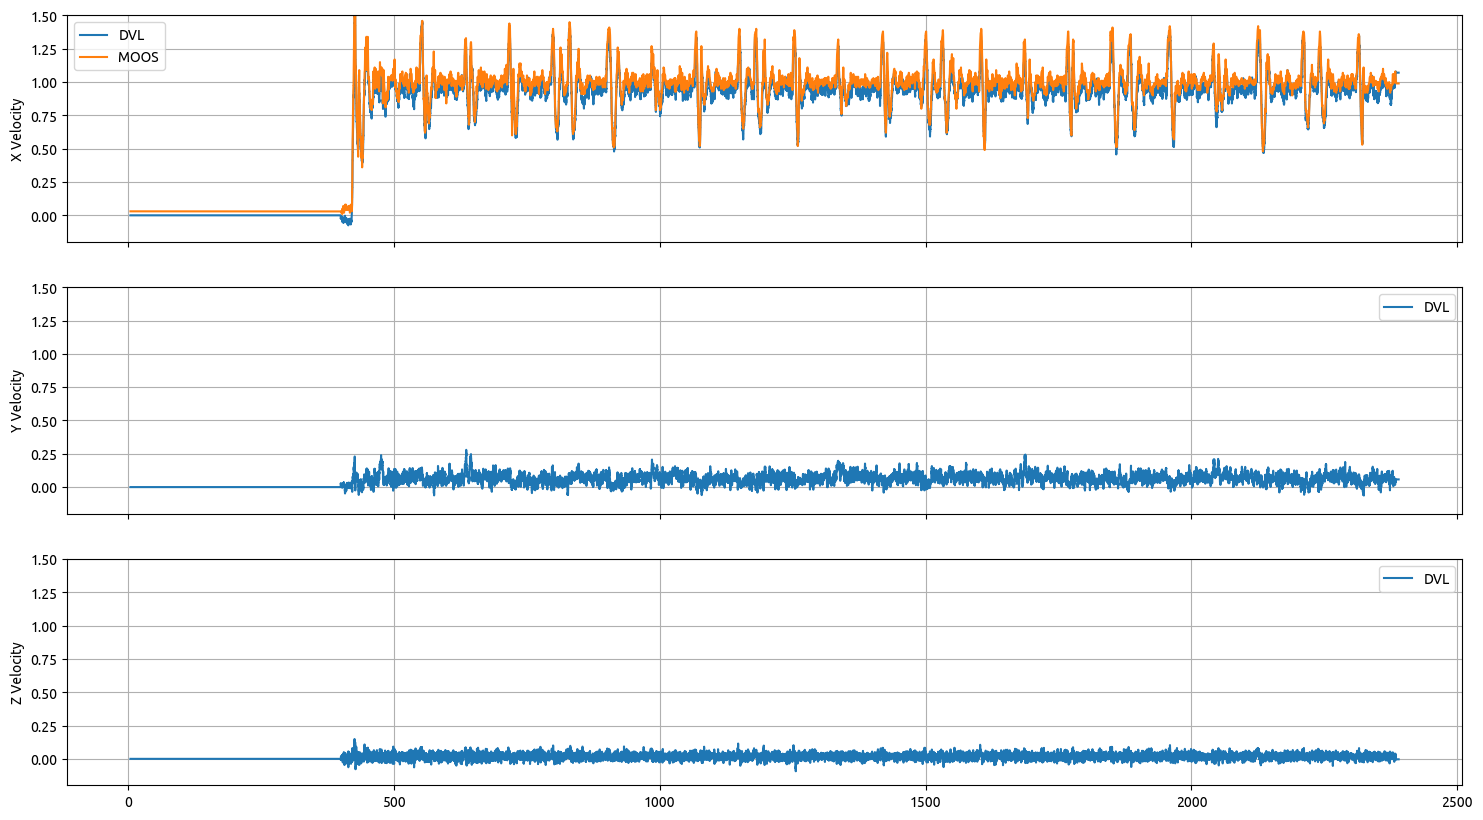

In [1027]:
# Plot the velocities from the DVL
fig8, (ax1_1, ax1_2, ax1_3) = plt.subplots(3, 1, figsize=(18, 10), sharex=True)

# Delta x, y, z
ax1_1.plot(all_data_df.index, all_data_df['vx'], label='DVL')
ax1_1.plot(all_data_df.index, all_data_df['SPD'], label='MOOS')
ax1_1.set_ylabel('X Velocity')
ax1_1.legend()
ax1_1.grid(True)
ax1_1.set_ylim([-0.2, 1.5])

ax1_2.plot(all_data_df.index, all_data_df['vy'], label='DVL')
ax1_2.set_ylabel('Y Velocity')
ax1_2.legend()
ax1_2.grid(True)
ax1_2.set_ylim([-0.2, 1.5])

ax1_3.plot(all_data_df.index, all_data_df['vz'], label='DVL')
ax1_3.set_ylabel('Z Velocity')
ax1_3.legend()
ax1_3.grid(True)
ax1_3.set_ylim([-0.2, 1.5])

fig5.suptitle('Figure 5: DVL Data - Position and Angle Deltas', fontsize=16)
fig5.autofmt_xdate()
fig5.tight_layout()

In [1028]:
# Plot the velocities from the DVL
fig8, (ax1_1, ax1_2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Delta x, y, z
x = all_data_df['X']-all_data_df['X'].iloc[0]
x_dvl = all_data_df['naive_dvl_x']
ax1_1.plot(x.index, x, label='X GPS')
ax1_1.plot(x.index, x_dvl, label='X DVL')
ax1_1.set_ylabel('X')
ax1_1.legend()
ax1_1.grid(True)


y = all_data_df['Y']-all_data_df['Y'].iloc[0]
y_dvl = all_data_df['naive_dvl_y']
ax1_2.plot(y.index, y, label='Y GPS')
ax1_2.plot(y.index, y_dvl, label='Y DVL')
ax1_2.set_ylabel('Y')
ax1_2.legend()
ax1_2.grid(True)`

fig5.suptitle('Figure 5: DVL Data - Position and Angle Deltas', fontsize=16)
fig5.autofmt_xdate()
fig5.tight_layout()

SyntaxError: invalid syntax (3992887899.py, line 20)